In [1]:
import os
import json
import pickle
import numpy as np
import pandas as pd
from collections import Counter
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

data2020 = json.loads(open('data/data2020.json').read())
data2021 = json.loads(open('data/data2021.json').read())
data = data2020 + data2021
print(len(data))

224897


In [2]:
labels_ref = pickle.load(open('data/labels_ref.gt2020.rand123','rb'))
print(len(labels_ref))
print(np.mean([len(set(docu['meshMajor']).intersection(labels_ref)) for docu in data]))

18211
12.298256535213898


In [3]:
term2count_all = Counter([x for docu in data for x in docu['meshMajor'] if x in labels_ref])
print(np.mean(list(term2count_all.values())))

151.87749162594037


In [4]:
sorted_terms = term2count_all.most_common()
sorted_values = [x[1] for x in sorted_terms]
sorted_ids = [x[0] for x in sorted_terms]

pair2count = Counter([x for docu in data for x in combinations(docu['meshMajor'],2)])
pij = np.array([ [pair2count[tuple(sorted([i,j]))] for j in sorted_ids] for i in sorted_ids])/np.array(sorted_values)

In [5]:
pij = np.sqrt(np.sqrt(pij.T)) # to better visualize

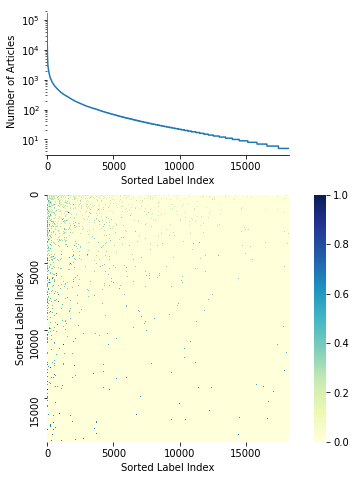

In [6]:
fig, ax  = plt.subplots(2, 2, sharex='col', gridspec_kw={'width_ratios':[100,5], 'height_ratios':[3,5]},figsize=(5,8))
ax[0,1].remove()  # remove unused upper right axes

ax[0,0].plot(np.arange(0,len(term2count_all),1),sorted(term2count_all.values(),reverse=True))
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel('Sorted Label Index')
ax[0,0].set_ylabel('Number of Articles')

left_side = ax[0,0].spines["left"]
left_side.set_visible(False)
up_side = ax[0,0].spines["top"]
up_side.set_visible(False)
right_side = ax[0,0].spines["right"]
right_side.set_visible(False)


sns.heatmap(pij, cmap="YlGnBu", xticklabels=5000, yticklabels=5000, square=False, ax=ax[1,0], cbar_ax=ax[1,1]) #, vmax=np.max(M_1), center=np.max(M_1)/2.)
ax[0,1].set_aspect('equal', adjustable='box')
ax[1,0].set_xlabel('Sorted Label Index')
ax[1,0].set_ylabel('Sorted Label Index')

ax[0,0].tick_params(axis="x", which="both", labelbottom=True)
ax[0,0].set_xticks(np.arange(0, 18200, 5000))
ax[0,0].set_xticklabels(np.arange(0, 18200, 5000))


fig.savefig('PubMed_both.png', format='png', dpi=500)